In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\jaya1\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
#importing packages

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
#loading data

df = pd.read_csv('creditcard.csv.zip')

In [4]:
#shape of df

print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [5]:
#shape of df

print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [6]:
#peek at data

df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54759,46602.0,0.552155,-1.399284,-0.109265,0.504668,-0.706982,0.417907,0.013132,0.116120,-1.329923,...,-0.170036,-0.792478,-0.174133,-0.355645,0.127598,-0.473549,-0.002359,0.069537,352.51,0
147523,88642.0,2.144400,-1.012297,-1.017395,-1.351168,-0.992512,-1.108857,-0.540702,-0.343547,0.200494,...,-0.239347,-0.024116,0.150195,-0.051694,-0.192191,0.745773,-0.039750,-0.054742,36.00,0
101605,67891.0,-0.641044,-0.568909,2.795238,-1.520310,-1.292858,0.579377,-0.947602,0.584874,0.184985,...,0.232912,0.774280,-0.328542,-0.001603,0.156361,-0.194292,0.116144,0.085621,14.00,0
189730,128538.0,2.143940,-0.500922,-1.130038,-0.643863,-0.622635,-1.208705,-0.493504,-0.268260,-0.336402,...,-0.320681,-0.914502,0.451295,-0.156967,-0.530468,-0.675176,0.012604,-0.014733,19.95,0
252902,156017.0,2.122243,0.589527,-3.308544,0.686192,1.210255,-1.575039,0.721991,-0.390426,0.260668,...,-0.099847,-0.151130,-0.049350,0.366452,0.378269,0.696086,-0.091475,-0.017995,0.76,0


c:\users\jaya1\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

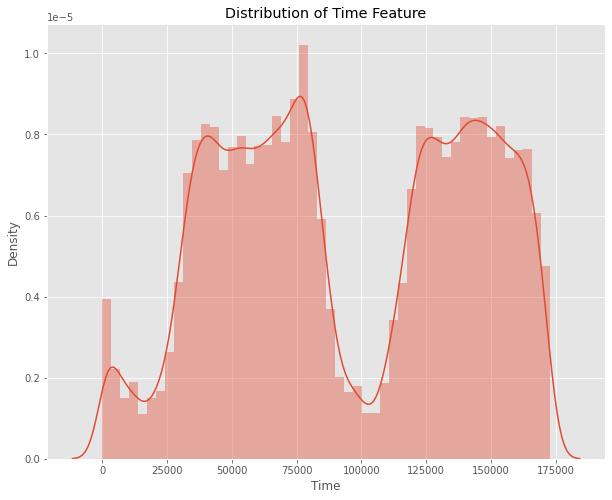

In [7]:
#visualizations of time and amount

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

c:\users\jaya1\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

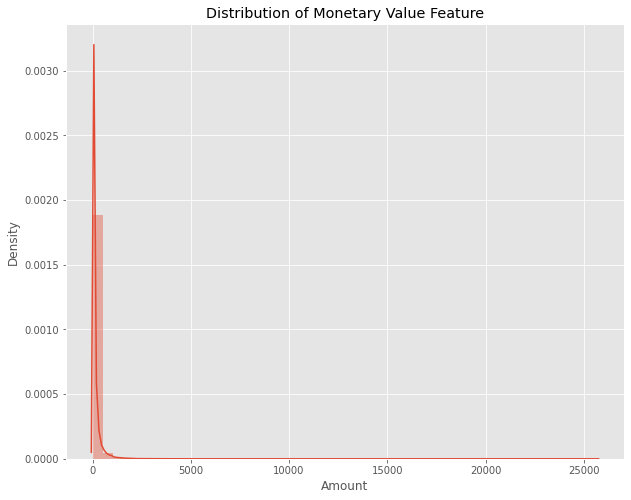

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [9]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

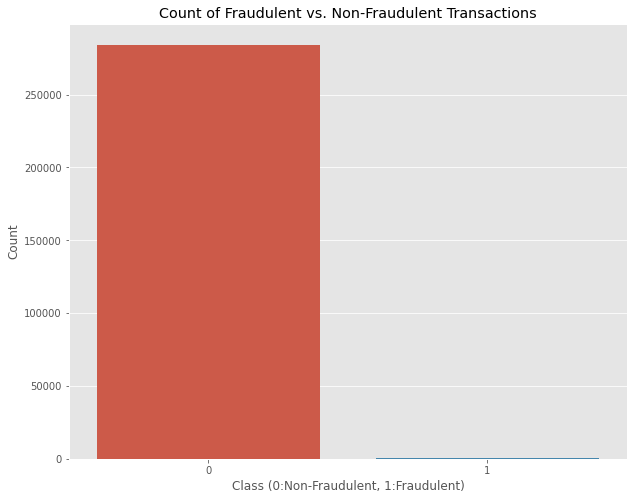

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Heatmap of Correlation')

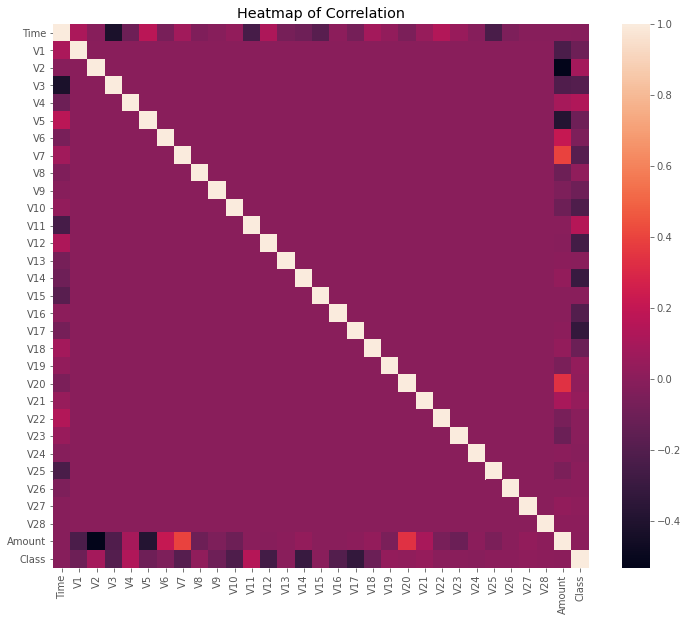

In [11]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [13]:
#scaling Time feature

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]    # making a flat list out of a list of lists
scaled_time = pd.Series(flat_list1)

In [14]:
#scaling Amount feature

scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [15]:
# adding the scaled features and dropping the unscaled features from the original dataframe

df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
193589,-0.151616,0.529571,1.432852,1.008631,0.547943,0.577313,0.658513,-0.001383,0.042109,-0.113209,...,-0.773567,0.116827,-0.481797,-0.812761,-1.031525,0.092992,-0.019255,0,-0.233327,0.745201
115911,1.103808,0.318604,0.670270,1.197965,-0.359577,-0.693414,0.168495,-0.167282,-0.191710,-0.099305,...,0.182012,0.036772,0.625823,0.434084,-0.448931,0.043649,0.034884,0,-0.234286,-0.436844
172603,0.814693,-0.913747,-1.427978,-1.801138,0.965163,4.216655,-1.092652,0.497200,-1.578134,2.528376,...,0.506861,0.384222,0.712149,-1.494404,0.019731,-0.402588,-0.199885,0,-0.065367,0.554900
6105,0.965085,-0.539907,0.426388,0.705499,-0.587331,-0.047556,-0.357082,-0.087301,1.920717,-0.511202,...,0.089655,-0.338481,-0.583628,0.399461,0.621478,-0.078103,0.032512,0,0.367066,-1.849557
258294,-0.573476,-1.721387,0.435246,-2.292132,1.183597,2.067333,-1.119794,0.508232,-1.795006,1.515177,...,0.684072,0.263547,-2.775670,-0.884657,0.089452,-0.005139,-0.003193,0,-0.313249,1.342783


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

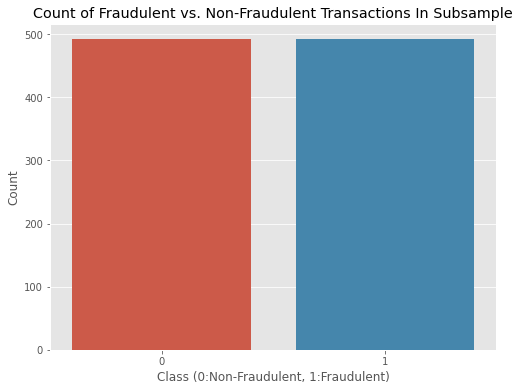

In [16]:
# undersampling with 1:1 ratio of legal and fraud transactions

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]



new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [17]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [18]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.560738
V9,-0.549790
V10,-0.627001
V12,-0.682319
V14,-0.748537
V16,-0.597866
V17,-0.562174


In [19]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.714555
V11,0.692814
Class,1.000000


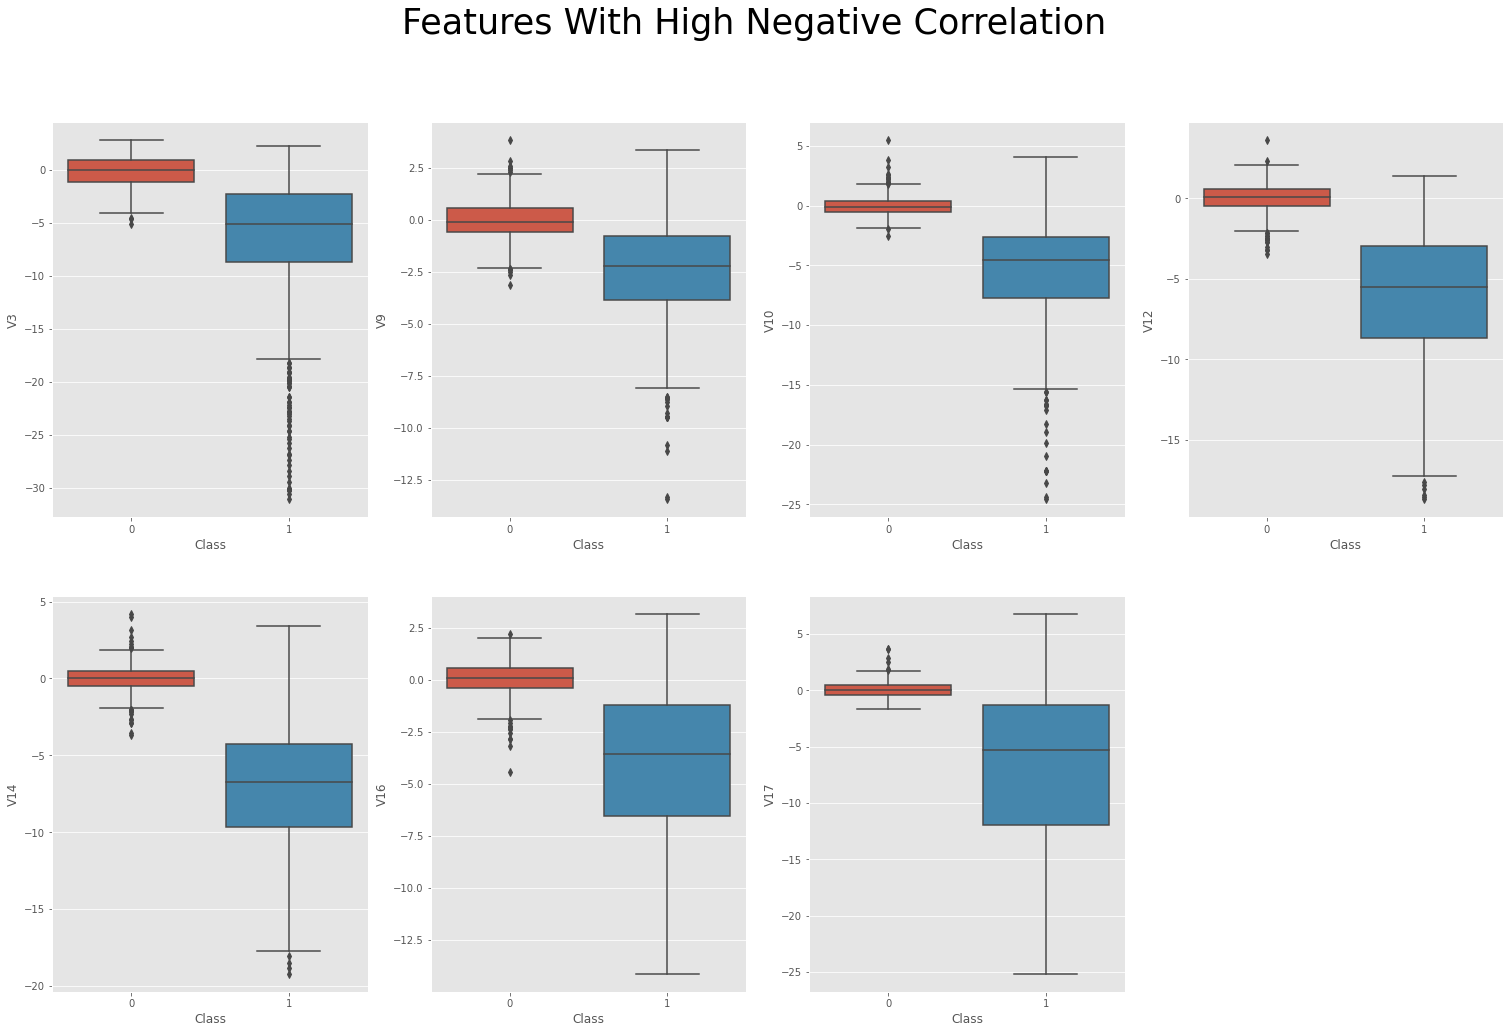

In [20]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

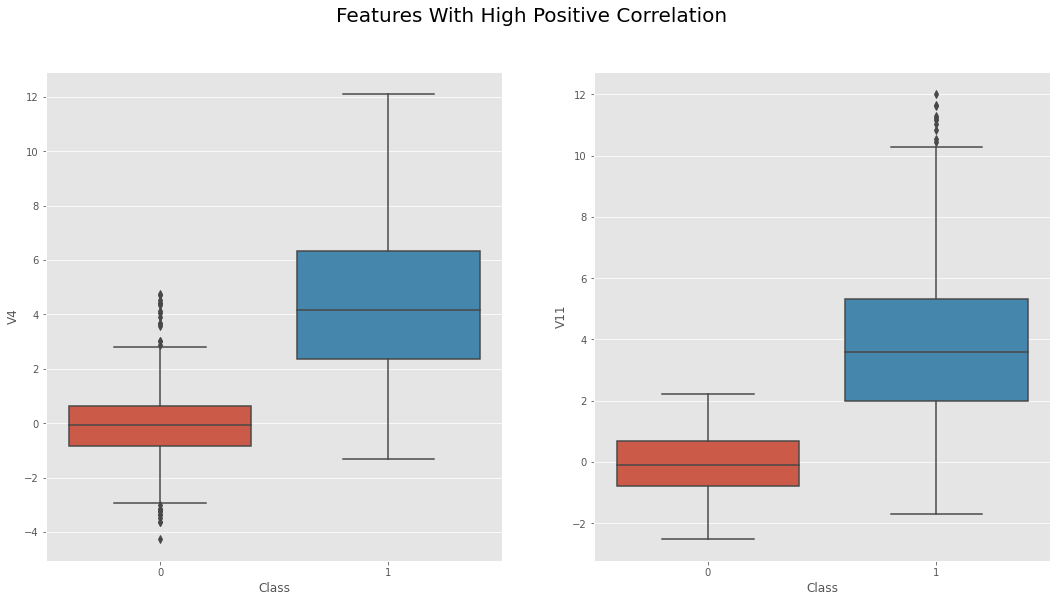

In [21]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1])

In [22]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [23]:
len_after = len(df2)
len_before = len(under_sample)
len_difference = len(under_sample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'
      .format(len_before, len_difference, len_after))

We reduced our data size from 984 transactions by 292 transactions to 692 transactions.


In [24]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [25]:
X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [26]:
#importing relevant packages

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [27]:
# paramter tuning for Support Vector Machine

def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_svm = svc_param_selection(X_under_train,y_under_train)

print(best_params_svm)

{'C': 10, 'gamma': 0.01}


In [28]:
# parameter tuning for Random Forest

def rf_param_selection(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = rf_param_selection(X_under_train,y_under_train)

print(best_params)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [29]:
# comparison of the three algorithms


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9426618851175554
ROC-AUC: 0.9747245856555505


Support Vector Machine:

F1 Score: 0.9576705737079727
ROC-AUC: 0.9765067312770906


Random Forest:

F1 Score: 0.9431091810305426
ROC-AUC: 0.974801691222555




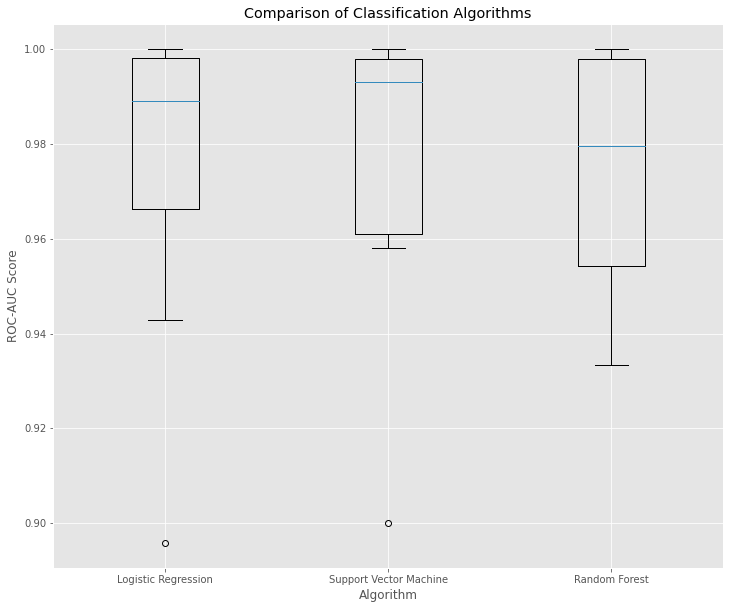

In [30]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

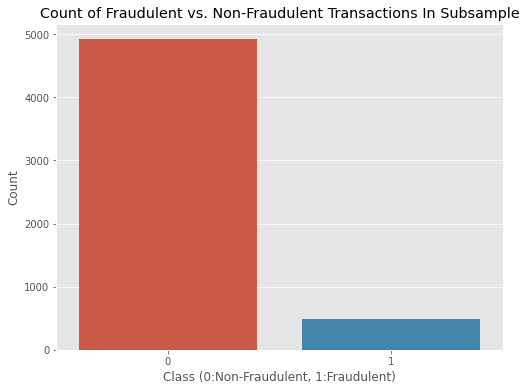

In [31]:
# 15% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


In [32]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [33]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9460601775492176
ROC-AUC: 0.9671801326488033


Support Vector Machine:

F1 Score: 0.9509067145727184
ROC-AUC: 0.9450411193632766


Random Forest:

F1 Score: 0.9490450275016187
ROC-AUC: 0.961567394278109




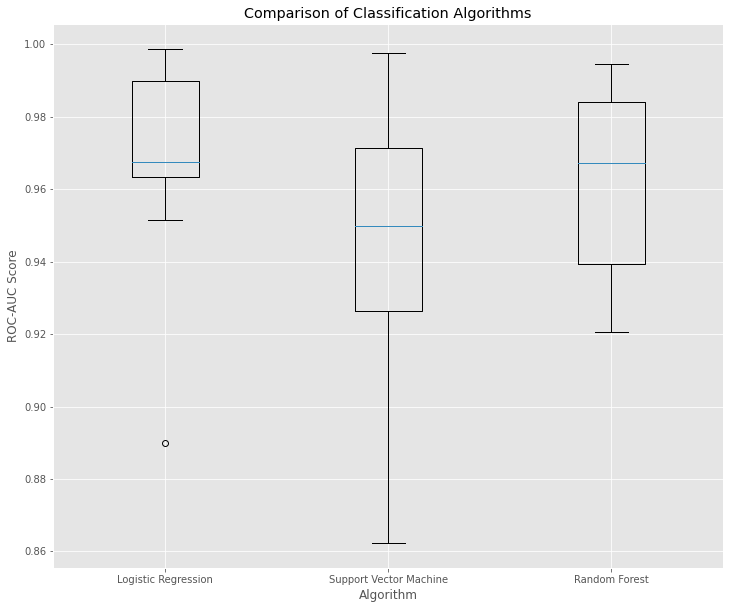

In [34]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

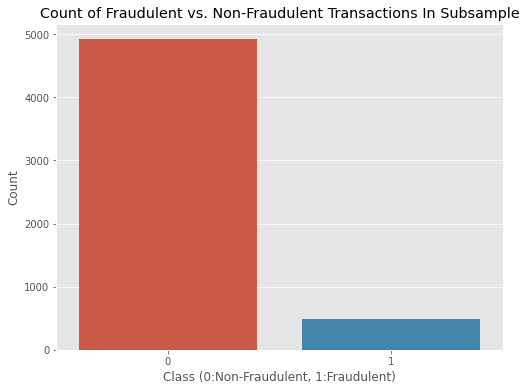

In [35]:
# 10% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


In [36]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [37]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.948701928017789
ROC-AUC: 0.9658018866036355


Support Vector Machine:

F1 Score: 0.9422553840531036
ROC-AUC: 0.9287412424925323


Random Forest:

F1 Score: 0.9471657672765786
ROC-AUC: 0.9590904766254249




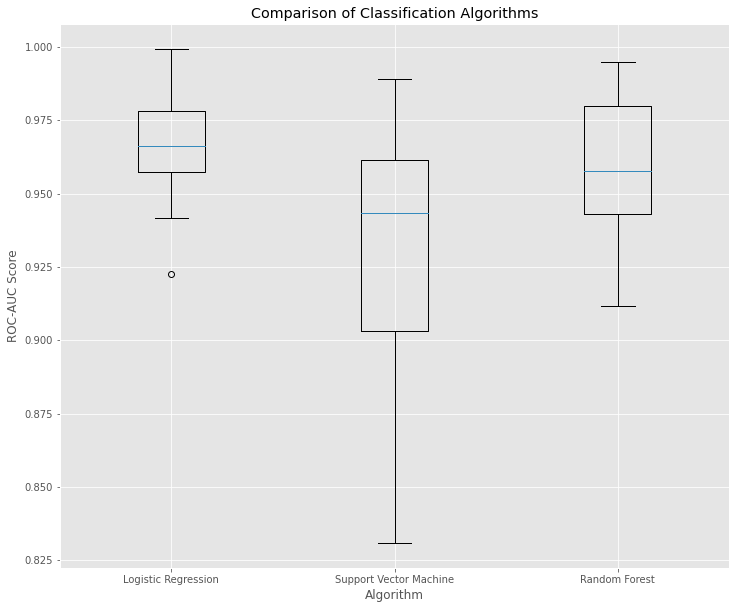

In [38]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

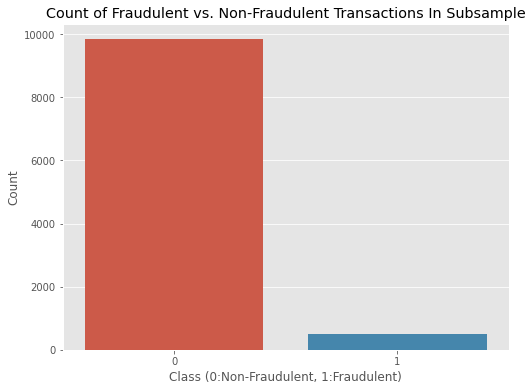

In [39]:
# 5% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.05), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [40]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [41]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9460589996720643
ROC-AUC: 0.9752822880609544


Support Vector Machine:

F1 Score: 0.9431003511670438
ROC-AUC: 0.9514652074271135


Random Forest:

F1 Score: 0.9444513975128782
ROC-AUC: 0.962888937722122




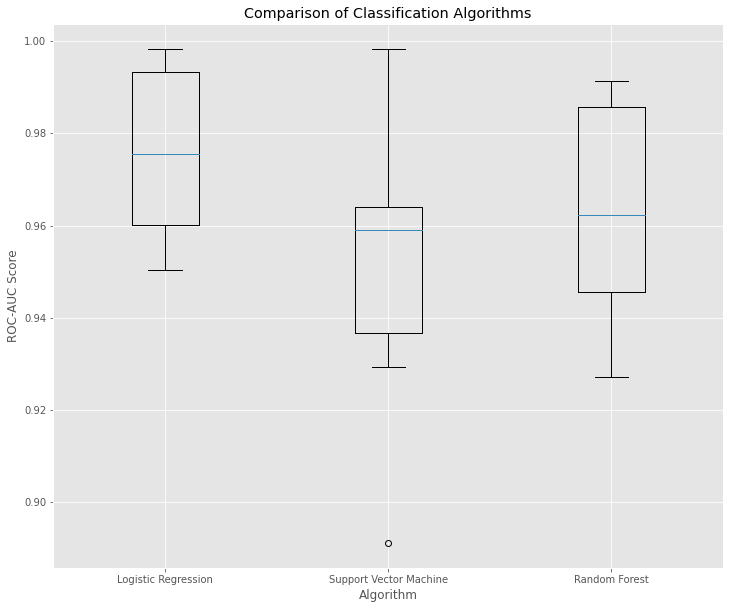

In [42]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()